#### Disclaimer: The data is about Asteroids – NeoWs (Near Earth Object Web Service. It is a RESTfulweb service for near earth Asteroid information. With NeoWs a user can: search for Asteroids basedon their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, aswell as browse the overall dataset. Inspiration is to find potential hazardous, non-hazardousasteroids and features responsible for claiming an asteroid to be hazardous.
#### Dataset description: It has 4687 rows of data and 40 different columns.
#### Dataset link: https://www.kaggle.com/shrutimehta/nasa-asteroids-classification
#### Task: In this notebook, the use of the 'xgboost' algorithm for classification is demonstrated. Thescope of this case study is to predict whether an asteroid can be hazardous or not based on itscharacteristics/properties using XGBClassier , BayesianOptimization and RandomizedSearchCV function.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer   
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option('max_colwidth', None)

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week6\day2\nasa.csv')
df = data.copy()
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,37597

In [3]:
df.columns = df.columns.str.strip().str.replace('[ ()]', '_', regex=True).str.lower().str.replace('.', '')
df.columns

Index(['neo_reference_id', 'name', 'absolute_magnitude', 'est_dia_in_km_min_',
       'est_dia_in_km_max_', 'est_dia_in_m_min_', 'est_dia_in_m_max_',
       'est_dia_in_miles_min_', 'est_dia_in_miles_max_',
       'est_dia_in_feet_min_', 'est_dia_in_feet_max_', 'close_approach_date',
       'epoch_date_close_approach', 'relative_velocity_km_per_sec',
       'relative_velocity_km_per_hr', 'miles_per_hour',
       'miss_dist_astronomical_', 'miss_dist_lunar_', 'miss_dist_kilometers_',
       'miss_dist_miles_', 'orbiting_body', 'orbit_id',
       'orbit_determination_date', 'orbit_uncertainity',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination',
       'asc_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_arg', 'aphelion_dist', 'perihelion_time', 'mean_anomaly',
       'mean_motion', 'equinox', 'hazardous'],
      dtype='object')

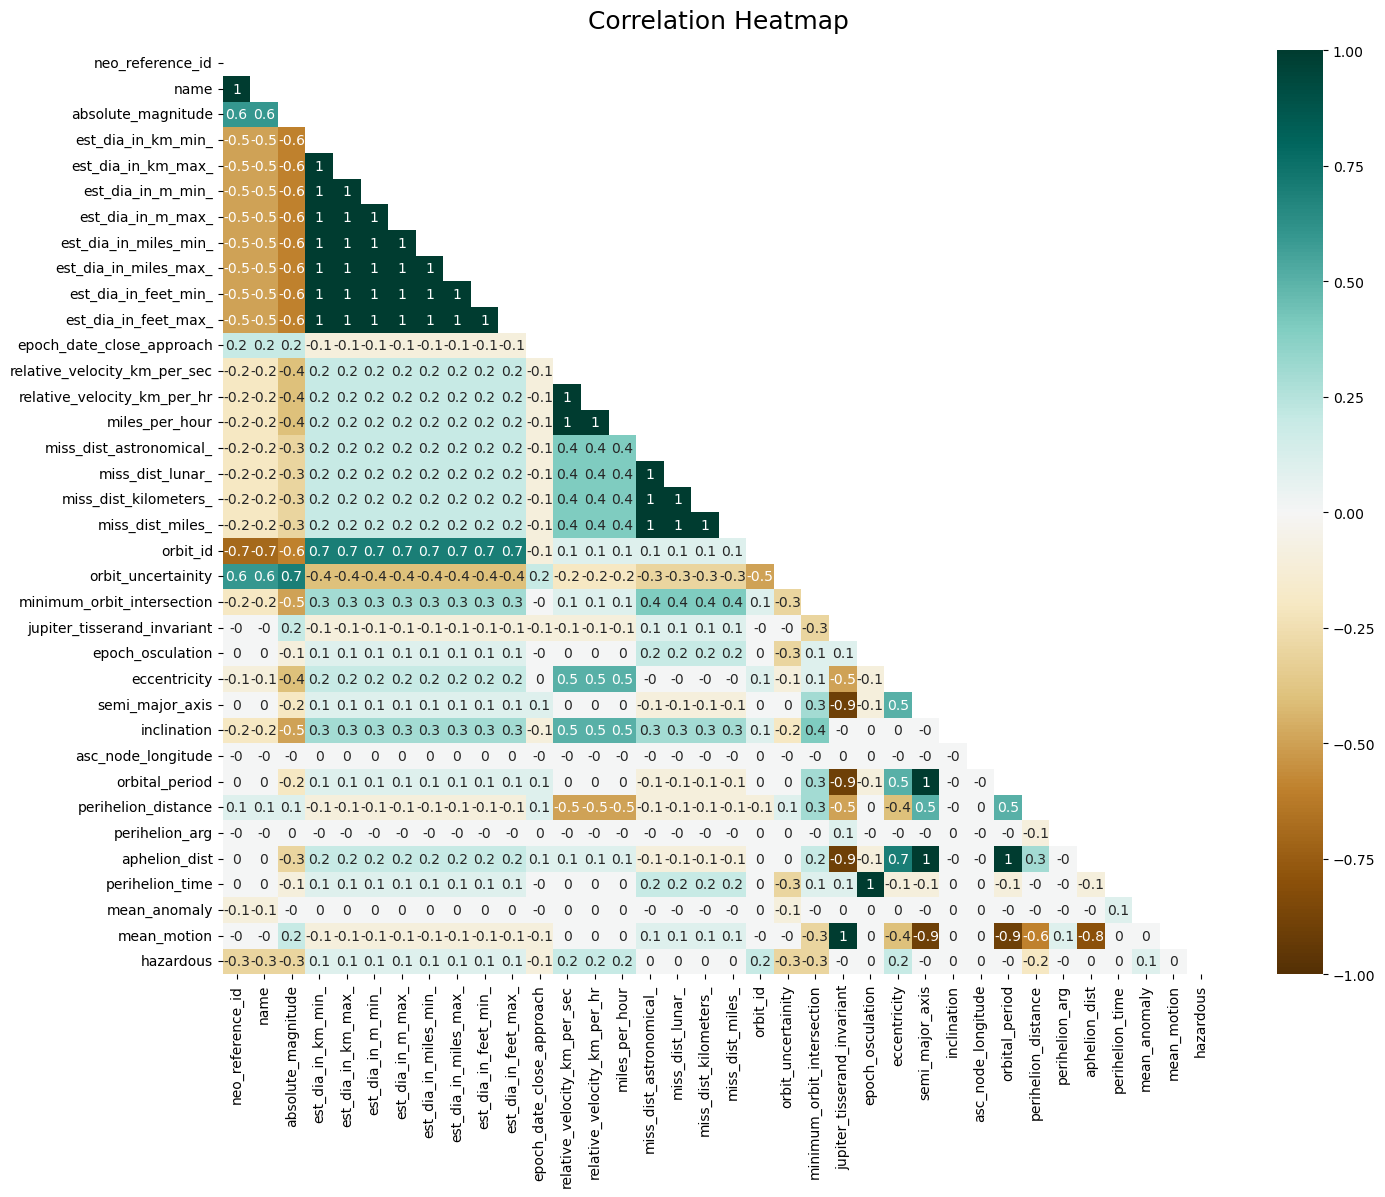

In [4]:
plt.figure(figsize=(16, 12))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype='bool'))

heatmap = sns.heatmap(round(df.corr(numeric_only=True),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

In [5]:
df.isnull().sum().any()

False

In [6]:
df.columns

Index(['neo_reference_id', 'name', 'absolute_magnitude', 'est_dia_in_km_min_',
       'est_dia_in_km_max_', 'est_dia_in_m_min_', 'est_dia_in_m_max_',
       'est_dia_in_miles_min_', 'est_dia_in_miles_max_',
       'est_dia_in_feet_min_', 'est_dia_in_feet_max_', 'close_approach_date',
       'epoch_date_close_approach', 'relative_velocity_km_per_sec',
       'relative_velocity_km_per_hr', 'miles_per_hour',
       'miss_dist_astronomical_', 'miss_dist_lunar_', 'miss_dist_kilometers_',
       'miss_dist_miles_', 'orbiting_body', 'orbit_id',
       'orbit_determination_date', 'orbit_uncertainity',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination',
       'asc_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_arg', 'aphelion_dist', 'perihelion_time', 'mean_anomaly',
       'mean_motion', 'equinox', 'hazardous'],
      dtype='object')

In [7]:
df.drop(columns=['est_dia_in_km_max_', 'est_dia_in_m_min_', 'est_dia_in_m_max_', 'est_dia_in_miles_min_', 'est_dia_in_miles_max_',
'est_dia_in_feet_min_', 'est_dia_in_feet_max_', 'relative_velocity_km_per_hr', 'miles_per_hour', 
'miss_dist_kilometers_', 'miss_dist_miles_', 'miss_dist_lunar_', 'orbital_period', 'aphelion_dist',
'mean_motion', 'perihelion_time'], inplace=True)

In [8]:
df

,neo_reference_id,name,absolute_magnitude,est_dia_in_km_min_,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,miss_dist_astronomical_,orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,perihelion_distance,perihelion_arg,mean_anomaly,equinox,hazardous
0,3703080,3703080,21.600,0.127220,1995-01-01,788947200000,6.115834,0.419483,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,264.837533,J2000,True
1,3723955,3723955,21.300,0.146068,1995-01-01,788947200000,18.113985,0.383014,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,173.741112,J2000,False
2,2446862,2446862,20.300,0.231502,1995-01-08,789552000000,7.590711,0.050956,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,292.893654,J2000,True
3,3092506,3092506,27.400,0.008801,1995-01-15,790156800000,11.173874,0.285322,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,68.741007,J2000,False
4,3514799,3514799,21.600,0.127220,1995-01-15,790156800000,9.840831,0.407832,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,135.142133,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,2016-09-08,1473318000000,22.154265,0.041361,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,0.741558,276.395697,304.306025,J2000,False
4683,3759295,3759295,28.200,0.006089,2016-09-08,1473318000000,3.225150,0.006469,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,0.996434,42.111064,282.978786,J2000,False
4684,3759714,3759714,22.700,0.076658,2016-09-08,1473318000000,7.191642,0.061009,Earth,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,0.965760,274.692712,203.501147,J2000,False
4685,3759720,3759720,21.800,0.116026,2016-09-08,1473318000000,11.352090,0.260760,Earth,6,2017-04-06 08:23:42,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,1.185467,180.346090,203.524965,J2000,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neo_reference_id              4687 non-null   int64  
 1   name                          4687 non-null   int64  
 2   absolute_magnitude            4687 non-null   float64
 3   est_dia_in_km_min_            4687 non-null   float64
 4   close_approach_date           4687 non-null   object 
 5   epoch_date_close_approach     4687 non-null   int64  
 6   relative_velocity_km_per_sec  4687 non-null   float64
 7   miss_dist_astronomical_       4687 non-null   float64
 8   orbiting_body                 4687 non-null   object 
 9   orbit_id                      4687 non-null   int64  
 10  orbit_determination_date      4687 non-null   object 
 11  orbit_uncertainity            4687 non-null   int64  
 12  minimum_orbit_intersection    4687 non-null   float64
 13  jup

In [10]:
df.nunique()

neo_reference_id                3692
name                            3692
absolute_magnitude               269
est_dia_in_km_min_               269
close_approach_date              777
epoch_date_close_approach        777
relative_velocity_km_per_sec    4687
miss_dist_astronomical_         4673
orbiting_body                      1
orbit_id                         188
orbit_determination_date        2680
orbit_uncertainity                10
minimum_orbit_intersection      3678
jupiter_tisserand_invariant     2495
epoch_osculation                 429
eccentricity                    3692
semi_major_axis                 3692
inclination                     3692
asc_node_longitude              3692
perihelion_distance             3692
perihelion_arg                  3692
mean_anomaly                    3692
equinox                            1
hazardous                          2
dtype: int64

In [11]:
df.drop(['neo_reference_id', 'name', 'orbiting_body', 'equinox'], axis=1, inplace=True)

In [12]:
df

,absolute_magnitude,est_dia_in_km_min_,close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,miss_dist_astronomical_,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,perihelion_distance,perihelion_arg,mean_anomaly,hazardous
0,21.600,0.127220,1995-01-01,788947200000,6.115834,0.419483,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,264.837533,True
1,21.300,0.146068,1995-01-01,788947200000,18.113985,0.383014,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,173.741112,False
2,20.300,0.231502,1995-01-08,789552000000,7.590711,0.050956,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,292.893654,True
3,27.400,0.008801,1995-01-15,790156800000,11.173874,0.285322,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,68.741007,False
4,21.600,0.127220,1995-01-15,790156800000,9.840831,0.407832,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,135.142133,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,2016-09-08,1473318000000,22.154265,0.041361,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,0.741558,276.395697,304.306025,False
4683,28.200,0.006089,2016-09-08,1473318000000,3.225150,0.006469,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,0.996434,42.111064,282.978786,False
4684,22.700,0.076658,2016-09-08,1473318000000,7.191642,0.061009,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,0.965760,274.692712,203.501147,False
4685,21.800,0.116026,2016-09-08,1473318000000,11.352090,0.260760,6,2017-04-06 08:23:42,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,1.185467,180.346090,203.524965,False


In [13]:
df.orbit_determination_date, df.close_approach_date

(0       2017-04-06 08:36:37
 1       2017-04-06 08:32:49
 2       2017-04-06 09:20:19
 3       2017-04-06 09:15:49
 4       2017-04-06 08:57:58
                ...         
 4682    2017-04-06 08:24:07
 4683    2017-04-06 08:23:58
 4684    2017-04-06 08:23:43
 4685    2017-04-06 08:23:42
 4686    2017-04-29 06:18:33
 Name: orbit_determination_date, Length: 4687, dtype: object,
 0       1995-01-01
 1       1995-01-01
 2       1995-01-08
 3       1995-01-15
 4       1995-01-15
            ...    
 4682    2016-09-08
 4683    2016-09-08
 4684    2016-09-08
 4685    2016-09-08
 4686    2016-09-08
 Name: close_approach_date, Length: 4687, dtype: object)

In [14]:
df.drop(['orbit_determination_date', 'close_approach_date'], axis=1, inplace=True)

In [15]:
df

,absolute_magnitude,est_dia_in_km_min_,epoch_date_close_approach,relative_velocity_km_per_sec,miss_dist_astronomical_,orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,perihelion_distance,perihelion_arg,mean_anomaly,hazardous
0,21.600,0.127220,788947200000,6.115834,0.419483,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,264.837533,True
1,21.300,0.146068,788947200000,18.113985,0.383014,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,173.741112,False
2,20.300,0.231502,789552000000,7.590711,0.050956,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,292.893654,True
3,27.400,0.008801,790156800000,11.173874,0.285322,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,68.741007,False
4,21.600,0.127220,790156800000,9.840831,0.407832,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,135.142133,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,1473318000000,22.154265,0.041361,4,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,0.741558,276.395697,304.306025,False
4683,28.200,0.006089,1473318000000,3.225150,0.006469,2,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,0.996434,42.111064,282.978786,False
4684,22.700,0.076658,1473318000000,7.191642,0.061009,17,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,0.965760,274.692712,203.501147,False
4685,21.800,0.116026,1473318000000,11.352090,0.260760,6,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,1.185467,180.346090,203.524965,False


In [16]:
df.shape

(4687, 18)

In [17]:
X = df.drop('hazardous', axis=1)
y = df['hazardous']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_train_cols)
X_test_cols = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_test_cols)

## Sample XGBT

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier(use_label_encoder = False)

In [22]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgb_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgb_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgb_pred))
print('f1_score: ', f1_score(y_test, xgb_pred))
print('precision_score: ', precision_score(y_test, xgb_pred))
print('recall_score: ', recall_score(y_test, xgb_pred))
print()
print('classification_report:\n', classification_report(y_test, xgb_pred))

confusion  matrix:
 [[787   0]
 [  2 149]]

accuracy:  0.997867803837953
roc_auc_score:  0.9933774834437086
f1_score:  0.9933333333333333
precision_score:  1.0
recall_score:  0.9867549668874173

classification_report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      0.99      1.00       938
weighted avg       1.00      1.00      1.00       938



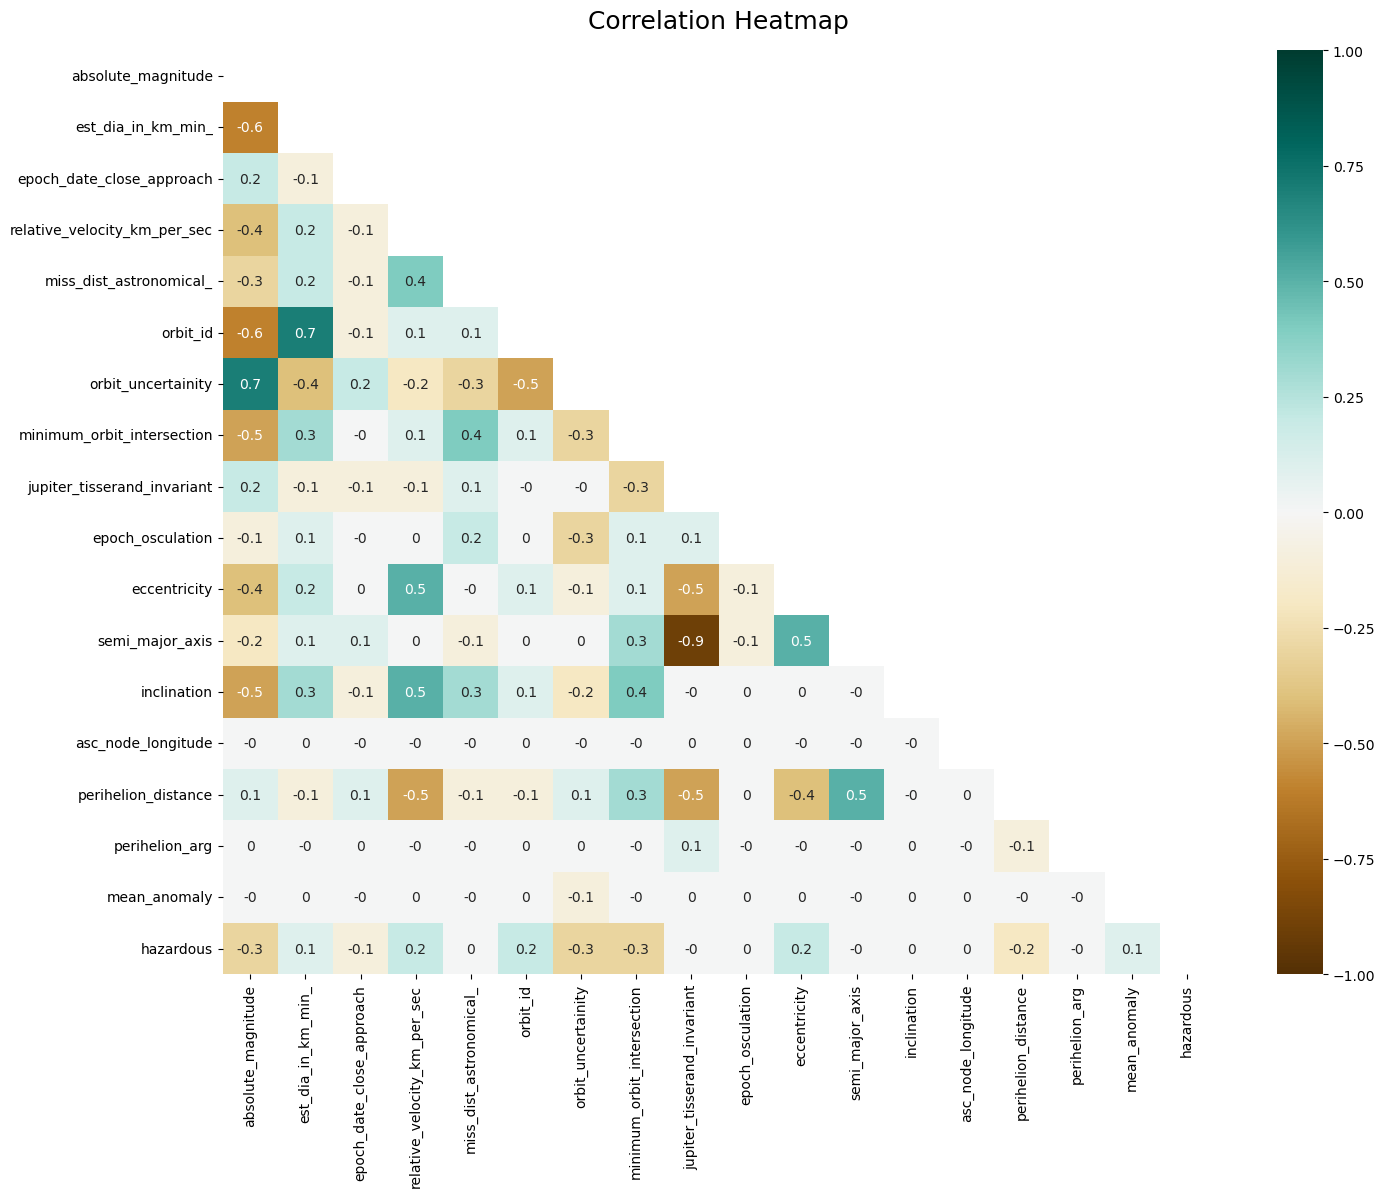

In [24]:
plt.figure(figsize=(16, 12))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype='bool'))

heatmap = sns.heatmap(round(df.corr(numeric_only=True),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

## BayesSearchCV

In [25]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from xgboost import XGBClassifier

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    XGBClassifier(),
    {
        'learning_rate': Real(0.01, 1, prior='uniform'),
        'n_estimators': Integer(1, 10, prior='uniform'),
        'max_depth': Integer(1, 5, prior='uniform')
    },
    n_iter=32,
    random_state=0
)

# executes bayesian optimization
opt_fit= opt.fit(X_train, y_train)

In [26]:
cv_results_xgb = pd.DataFrame.from_dict(opt_fit.cv_results_)

xgb_top_rank = cv_results_xgb[cv_results_xgb['rank_test_score'] == 1]

In [27]:
xgb_top_rank

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.079651,0.003712,0.029621,0.001357,0.998444,4,6,"{'learning_rate': 0.998444316001546, 'max_depth': 4, 'n_estimators': 6}",0.997333,0.996,0.996,0.997333,0.993324,0.995998,0.001464,1


In [28]:
best_opt_pred = opt.best_estimator_.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, best_opt_pred))
print()
print('accuracy: ', accuracy_score(y_test, best_opt_pred))
print('roc_auc_score: ', roc_auc_score(y_test, best_opt_pred))
print('f1_score: ', f1_score(y_test, best_opt_pred))
print('precision_score: ', precision_score(y_test, best_opt_pred))
print('recall_score: ', recall_score(y_test, best_opt_pred))
print()
print('classification_report:\n', classification_report(y_test, best_opt_pred))

confusion  matrix:
 [[787   0]
 [  2 149]]

accuracy:  0.997867803837953
roc_auc_score:  0.9933774834437086
f1_score:  0.9933333333333333
precision_score:  1.0
recall_score:  0.9867549668874173

classification_report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      0.99      1.00       938
weighted avg       1.00      1.00      1.00       938



In [40]:
print('\n\n')
print('XGBT')
print(xgb_top_rank['mean_test_score'])
# print(xgb_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(opt_fit.best_params_)




XGBT
18    0.995998
Name: mean_test_score, dtype: float64

 The best Parameters are : 
OrderedDict([('learning_rate', 0.998444316001546), ('max_depth', 4), ('n_estimators', 6)])


## RandomizedSearchCV

In [77]:
xgb_param = {'n_estimators': [1,2,3,4,5,6,7,8,9,10],
             'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5],
             'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [78]:
random = RandomizedSearchCV(estimator=xgb,
                           param_distributions=xgb_param,
                           scoring='recall',
                           cv=5,
                           n_iter=10,
                           return_train_score=True,
                           random_state=1234,
                           verbose = 0)

In [79]:
random_fit = random.fit(X_train, y_train)

In [80]:
cv_results_xgb_rs = pd.DataFrame.from_dict(random_fit.cv_results_)

xgb_top_rank_rs = cv_results_xgb_rs[cv_results_xgb_rs['rank_test_score'] == 1]

In [81]:
xgb_top_rank_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.067247,0.004879,0.028421,0.0012,9,6,0.3,"{'n_estimators': 9, 'max_depth': 6, 'learning_rate': 0.3}",0.991736,0.983471,0.983471,1.0,0.966667,0.985069,0.011056,1,1.0,0.989648,0.991718,0.99793,0.995868,0.995033,0.00384


In [83]:
print('\n\n')
print('XGBT')
print(xgb_top_rank_rs['mean_test_score'])
# print(xgb_top_rank['mean_train_score'])

# Print the best parameters of the Support Vector Classifier
print('\n The best Parameters are : ')
print(random_fit.best_params_)




XGBT
3    0.985069
Name: mean_test_score, dtype: float64

 The best Parameters are : 
{'n_estimators': 9, 'max_depth': 6, 'learning_rate': 0.3}


In [84]:
xgt_rs_pred = random_fit.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_rs_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgt_rs_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_rs_pred))
print('f1_score: ', f1_score(y_test, xgt_rs_pred))
print('precision_score: ', precision_score(y_test, xgt_rs_pred))
print('recall_score: ', recall_score(y_test, xgt_rs_pred))
print()
print('classification_report:\n', classification_report(y_test, xgt_rs_pred))

confusion  matrix:
 [[787   0]
 [  1 150]]

accuracy:  0.9989339019189766
roc_auc_score:  0.9966887417218543
f1_score:  0.9966777408637874
precision_score:  1.0
recall_score:  0.9933774834437086

classification_report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      0.99      1.00       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



In [91]:
xgt_rs_pred_best = random_fit.best_estimator_.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgt_rs_pred_best))
print()
print('accuracy: ', accuracy_score(y_test, xgt_rs_pred_best))
print('roc_auc_score: ', roc_auc_score(y_test, xgt_rs_pred_best))
print('f1_score: ', f1_score(y_test, xgt_rs_pred_best))
print('precision_score: ', precision_score(y_test, xgt_rs_pred_best))
print('recall_score: ', recall_score(y_test, xgt_rs_pred_best))
print()
print('classification_report:\n', classification_report(y_test, xgt_rs_pred_best))

confusion  matrix:
 [[787   0]
 [  1 150]]

accuracy:  0.9989339019189766
roc_auc_score:  0.9966887417218543
f1_score:  0.9966777408637874
precision_score:  1.0
recall_score:  0.9933774834437086

classification_report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      0.99      1.00       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



In [108]:
xgbt_model = XGBClassifier(use_label_encoder = False, n_estimators = 9, learning_rate=0.3, max_depth=6)

In [109]:
xgbt_model_fit = xgbt_model.fit(X_train, y_train)
xgbt_model_pred = xgbt_model_fit.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, precision_score, \
                                                        recall_score, confusion_matrix, classification_report
print('confusion  matrix:\n', confusion_matrix(y_test, xgbt_model_pred))
print()
print('accuracy: ', accuracy_score(y_test, xgbt_model_pred))
print('roc_auc_score: ', roc_auc_score(y_test, xgbt_model_pred))
print('f1_score: ', f1_score(y_test, xgbt_model_pred))
print('precision_score: ', precision_score(y_test, xgbt_model_pred))
print('recall_score: ', recall_score(y_test, xgbt_model_pred))
print()
print('classification_report:\n', classification_report(y_test, xgbt_model_pred))

confusion  matrix:
 [[787   0]
 [  1 150]]

accuracy:  0.9989339019189766
roc_auc_score:  0.9966887417218543
f1_score:  0.9966777408637874
precision_score:  1.0
recall_score:  0.9933774834437086

classification_report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       787
        True       1.00      0.99      1.00       151

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938

